In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [102]:
data = pd.read_csv('cleaned_data.csv')

In [103]:
data.head()

,title,price,hang,dong,baohanh,mausac,dungluong,xuatxu,tinhtrang
0,iphone 14 Pro vs 14 Pro Max 128GB 256GB BH 1 đ...,17999000,0,374,2,2,128,0,1
1,iPhone 5s vs 5se (SE 2016) 16GB 32GB BH 1 đổi 1,700000,0,384,1,2,32,0,1
2,Samsung Galaxy Note 20 vs Note 20 Ultra BH 1 đ...,5500000,20,160,2,2,256,0,1
3,iPhone 11 Pro Max 64G Quốc Tế/Trả góp 0đ,6990000,0,362,3,2,64,2,1
4,Galaxy S22 5G Mỹ 2 Sim chip Snap 8 Gen 1 Nguyên Z,7900000,20,178,3,3,128,2,1


In [104]:
data.describe()

,price,hang,dong,baohanh,mausac,dungluong,xuatxu,tinhtrang
count,2.650000e+03,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,6.559984e+06,9.509811,276.282264,1.881132,5.557736,133.292075,2.337736,1.184151
std,5.994591e+06,10.909668,121.814650,0.794839,3.027474,78.873055,2.052420,0.496927
min,1.000000e+04,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,1.000000
25%,2.100000e+06,0.000000,173.000000,1.000000,3.000000,64.000000,0.000000,1.000000
50%,4.700000e+06,0.000000,360.000000,2.000000,6.000000,128.000000,2.000000,1.000000
75%,8.999999e+06,20.000000,372.000000,3.000000,9.000000,224.000000,5.000000,1.000000
max,3.250000e+07,28.000000,397.000000,3.000000,11.000000,256.000000,8.000000,3.000000


In [105]:
df = data.drop('title',axis=1)

In [106]:
df

,price,hang,dong,baohanh,mausac,dungluong,xuatxu,tinhtrang
0,17999000,0,374,2,2,128,0,1
1,700000,0,384,1,2,32,0,1
2,5500000,20,160,2,2,256,0,1
3,6990000,0,362,3,2,64,2,1
4,7900000,20,178,3,3,128,2,1
...,...,...,...,...,...,...,...,...
2645,3000000,26,333,3,4,128,0,1
2646,9500000,0,366,2,3,16,0,1
2647,13000000,0,370,1,7,128,2,1
2648,6600000,0,397,3,9,256,2,2


In [107]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
x = df.drop('price', axis= 1)
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state = 42)

In [108]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2385, 7)
X_test: (265, 7)
Y_train: (2385,)
Y_test: (265,)


In [110]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler cho phương pháp Z-score
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [111]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train_scaled_ = scaler.fit_transform(x_train)
x_test_scaled_ = scaler.transform(x_test)

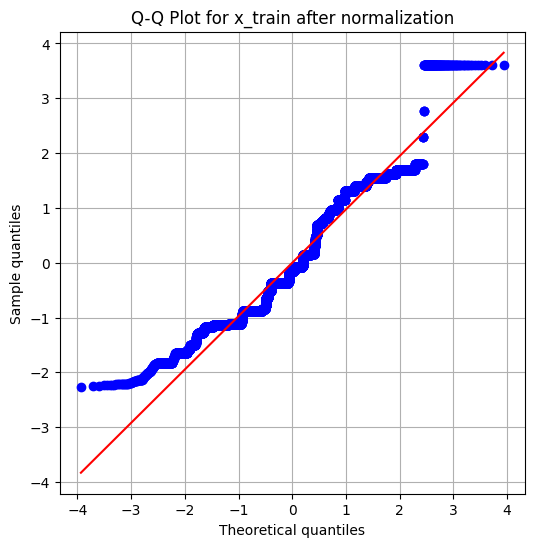

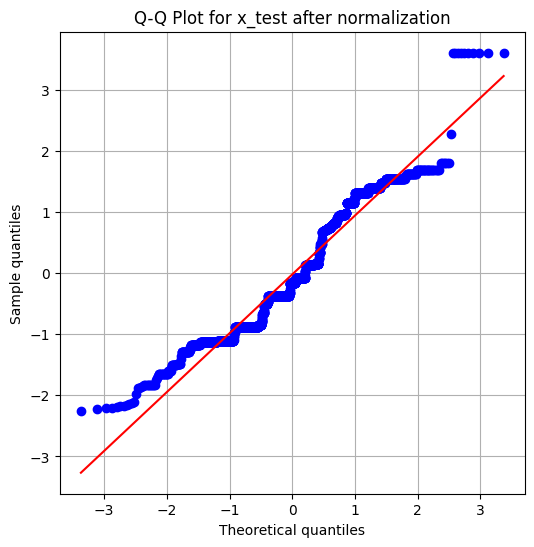

In [112]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(x_train_scaled.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for x_train after normalization')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

# Vẽ đồ thị QQ cho x_test_normalized
plt.figure(figsize=(6, 6))
stats.probplot(x_test_scaled.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for x_test after normalization')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

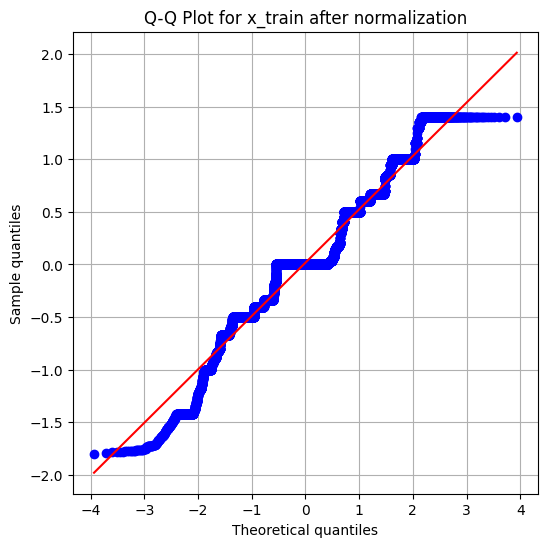

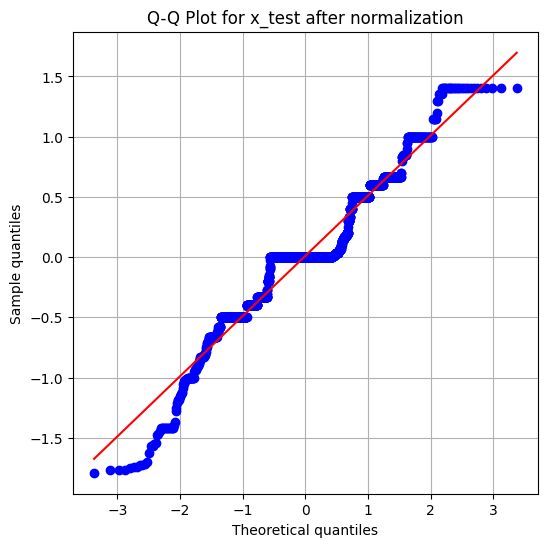

In [113]:
plt.figure(figsize=(6, 6))
stats.probplot(x_train_scaled_.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for x_train after normalization')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

# Vẽ đồ thị QQ cho x_test_normalized
plt.figure(figsize=(6, 6))
stats.probplot(x_test_scaled_.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for x_test after normalization')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.grid(True)
plt.show()

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
reg = LinearRegression()

In [116]:
labels = data['price']
train1 = data.drop(['title', 'price'],axis=1)

In [117]:
from sklearn.model_selection import train_test_split

x_train_scaled_ , x_test_scaled_ , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [118]:
reg.fit(x_train_scaled_,y_train)

LinearRegression()

In [119]:
reg.score(x_test_scaled_,y_test)

0.49498299642969457

In [120]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.01, loss = 'huber')

In [121]:
clf.fit(x_train_scaled_, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=5,
                          n_estimators=400)

In [122]:
clf.score(x_test_scaled_,y_test) 

0.9014924948287563

In [123]:
params = {
    'n_estimators': 400,  # Số lượng cây quyết định
    'learning_rate': 0.1,  # Tỷ lệ học
    'max_depth': 5,  # Độ sâu tối đa của các cây
    'min_samples_split': 2,  # Số lượng mẫu tối thiểu cần thiết để chia một nút
    'loss': 'huber'  # Hàm loss sử dụng trong quá trình huấn luyện
}

# Khởi tạo mảng t_sc với kích thước và kiểu dữ liệu đã xác định
t_sc = np.zeros((params['n_estimators']), dtype=np.float64)


In [124]:
y_pred = reg.predict(x_test_scaled_)

In [125]:
def huber_loss(y_true, y_pred, delta):
    # Tính toán hàm mất mát Huber
    residual = y_true - y_pred
    huber_loss = np.where(np.abs(residual) < delta, 0.5 * residual ** 2, delta * (np.abs(residual) - 0.5 * delta))
    return np.mean(huber_loss)

# Định nghĩa delta cho hàm Huber
delta = 1.0

t_sc = np.zeros((params['n_estimators']), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test_scaled_)):
    t_sc[i] = huber_loss(y_test, y_pred, delta)

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r_squared)

Mean Squared Error (MSE): 3465408067988.45
Mean Absolute Error (MAE): 1118001.4286167885
R-squared (R^2): 0.9014924948287563


In [128]:
import tkinter as tk
from tkinter import ttk
mapping_dict_feature1 = {'Apple': 0, 'Samsung': 20, 'Xiaomi': 28, 'Oppo': 17, 'Huawei': 6, 'Realme': 19, 'Google': 4, 'Vsmart': 27, 'Sony': 23, 'LG': 9, 'Vivo': 26, 'Nokia phổ thông': 13, 'Hãng khác': 7, 'Nokia thông minh': 14, 'OnePlus': 16, 'Sharp': 21, 'Pocophone': 18, 'HTC': 5, 'Asus': 3, 'Nubia': 15, 'Tecno': 24, 'Motorola': 12, 'Aquos': 1, 'Meizu': 11, 'Itel': 8, 'Masstel': 10, 'Asanzo': 2, 'Ulefone': 25, 'Sky': 22}
mapping_dict_feature2 = {'iPhone 12 Pro Max': 366, 'Dòng khác': 76, 'iPhone 11': 360, 'iPhone XS Max': 397, 'iPhone 11 Pro Max': 362, 'iPhone 14 Pro Max': 374, 'iPhone 13 Pro Max': 370, 'iPhone 12': 363, 'iPhone XS': 396, 'iPhone 12 Pro': 365, 'iPhone 15 Pro Max': 378, 'iPhone 8 plus': 392, 'iPhone 7 plus': 390, 'iPhone 11 Pro': 361, 'iPhone XR': 395, 'iPhone 13': 367, 'iPhone 14 Plus': 372, 'iPhone 6S': 387, 'iPhone X': 394, 'iPhone 6': 385, 'iPhone 6S plus': 388, 'iPhone 13 Pro': 369, 'iPhone 7': 389, 'Redmi Note 11': 296, 'Galaxy S23 Ultra': 183, 'iPhone 14 Pro': 373, 'iPhone 12 Mini': 364, 'Galaxy Note 20 Ultra': 160, 'Galaxy Z Fold3': 197, 'iPhone 6 plus': 386, 'Galaxy A50': 123, 'Galaxy A31': 118, 'Galaxy S22 Ultra': 180, 'Galaxy Z Fold4': 198, 'Galaxy Note 10 Plus': 158, 'Galaxy Note 20': 159, 'Galaxy S20 Plus': 172, 'Redmi Note 12': 299, 'Galaxy Z Flip4': 193, 'Galaxy S21 Ultra': 177, 'iPhone 15 Pro': 377, 'Galaxy A51': 124, 'iPhone 15': 375, 'Dòng Khác': 75, 'iPhone SE': 393, 'iPhone 8': 391, 'iPhone 15 Plus': 376, 'iPhone 14': 371, 'Mate 20 Pro': 219, 'Redmi Note 8': 306, 'Galaxy Z Fold5': 199, 'Xperia 1': 340, 'Galaxy S24 Ultra': 184, 'Galaxy S10 plus': 168, 'Galaxy S20 FE': 171, 'Mi 10': 224, 'Xperia 5': 341, 'Galaxy S23 Plus': 182, 'Reno 2/2F': 312, 'Joy 4': 208, 'Galaxy S20 Ultra': 173, '12 Pro': 7, 'Galaxy Z Flip5': 194, 'Galaxy S22': 178, 'iPhone 5S': 383, 'F11': 81, 'Redmi Note 10s': 295, 'Galaxy J7 Prime': 146, 'Galaxy S21 Plus': 176, 'Galaxy Note 9': 164, 'Redmi 9A': 279, 'Mate 10': 218, '13 Pro': 16, 'Pixel 7 Pro': 264, 'Redmi Note 10': 293, 'Galaxy A70': 132, 'Redmi Note 9S': 310, 'Galaxy S21': 174, 'Galaxy A22': 114, 'iPhone 5SE': 384, '13 Lite': 15, '12': 6, 'iPhone 13 Mini': 368, 'Pixel 7': 263, 'Redmi K40': 287, 'Live 4': 210, 'Pixel 6': 261, 'Galaxy S9 Plus': 190, '13': 14, 'Galaxy Note 10': 156, 'Galaxy S20': 170, 'Nova 3i': 242, 'Mi 10T': 225, 'Redmi Note 11 Pro': 297, 'V60 ThinQ': 337, 'F9': 86, 'Velvet': 338, 'Redmi K30 Ultra': 286, 'Redmi 9T/K20': 281, 'iPhone 4S': 381, 'Redmi K30': 284, 'A53': 50, 'Find X7': 94, 'Mi Mix 4': 239, 'P30 Pro': 247, 'C2': 71, 'Galaxy M31': 152, '8800': 35, 'Galaxy S7 Edge': 187, 'Galaxy Note 10 Lite': 157, 'Galaxy Note 8': 163, 'Galaxy S10E': 169, 'Galaxy S10': 165, 'Redmi Note 12 Turbo': 300, 'Xperia XZ2/Xperia XZ2 Compact': 343, 'Galaxy J7 Pro': 147, 'Pixel 6 Pro': 262, 'A3S': 47, 'A93': 64, 'Galaxy A03s': 101, 'A54': 51, 'Mate 30 Pro': 221, 'Joy 3': 207, 'F11 Pro': 82, 'Redmi Note 13': 301, '8 Pro': 33, 'Galaxy Z Fold2': 196, 'Galaxy M51': 155, 'Aris': 67, 'Mi 9T': 233, 'Galaxy J6 plus': 143, 'V30 ThinQ': 334, 'Active 3': 66, 'Find X5': 91, 'Reno4': 318, '11T': 4, 'Redmi Note 10 Pro': 294, 'F3 / F3 Lite': 84, 'Reno5 Pro': 320, 'Live': 209, 'Redmi 5 Plus': 276, 'Mi 8 Lite': 230, 'Galaxy A71': 133, 'F7': 85, 'Find X6 Pro': 93, 'V40 ThinQ': 335, 'Google Pixel 3': 200, '12X': 10, 'Galaxy S7': 186, 'Redmi Note 9': 308, 'Mi 8 SE': 231, 'Galaxy A02s': 99, 'Galaxy S21 FE': 175, 'Galaxy S22 Plus': 179, 'Redmi 9C': 280, 'iPhone 4': 380, 'A5': 48, 'Galaxy A5': 122, 'A73': 57, 'Reno3': 317, 'Red Magic': 271, 'Reno8 T': 325, 'Reno7': 323, 'Galaxy A23': 115, 'Galaxy J7': 144, 'Redmi K40s': 289, '5i': 26, 'Galaxy A20': 112, 'Xperia XZ3': 344, 'P30': 245, 'A5S': 55, 'Galaxy S10 X': 167, 'U12 Plus': 331, 'Galaxy A52': 125, 'Redmi K70': 292, 'X80': 339, 'A77': 59, 'Galaxy M33': 154, 'Black Shark 4': 68, 'POCO M4 Pro': 255, 'Reno2 Z': 316, 'Galaxy A10S': 108, 'ROG Phone 6': 270, 'Galaxy A03': 100, 'POCO X3 Pro': 257, 'Galaxy A90': 137, 'Reno7 Pro': 324, 'Pixel 5': 260, 'P40 Pro': 249, 'Reno': 311, 'Redmi Note 13 Pro': 302, 'Galaxy Z Fold': 195, 'Galaxy A10': 106, 'Y91C': 357, 'V23e': 333, 'Mate 40 Pro': 222, 'Galaxy A32': 119, 'Galaxy J7 Plus': 145, '12T': 8, '6700': 31, 'Galaxy A7': 131, 'Galaxy J4': 141, 'C11': 70, 'Galaxy A34': 121, '12T Pro': 9, 'Reno Z': 313, 'ROG Phone 5': 269, 'A16K': 41, '11T Pro': 5, 'Pixel 4': 259, 'Mi A2': 234, 'Reno5': 319, 'Galaxy A04': 102, 'G8 ThinQ': 97, 'Mi A2 Lite': 235, 'Redmi 10A': 272, 'Lumia 1020': 211, 'Galaxy A54': 128, 'A78': 60, 'Galaxy A30': 117, 'R15': 266, 'Galaxy A12': 110, 'Galaxy A33': 120, 'P50': 250, 'A52': 49, '6': 27, 'Redmi Note 7': 305, '12s Pro': 12, 'Galaxy S8': 188, 'P50 Pro': 251, 'Redmi K40 Pro': 288, 'Mi 11': 226, 'Y9': 356, 'Mi 8': 229, 'Mi 11 Ultra': 227, 'Galaxy A6 Plus': 130, 'Galaxy A20s': 113, 'A92': 63, 'Galaxy M32': 153, 'V50 ThinQ': 336, 'Galaxy M20': 151, 'A57': 53, 'Y7 Pro': 355, 'A9': 61, '7 Pro': 32, 'Ericsson': 79, '9 Pro': 37, 'V15': 332, 'Galaxy A9 Pro': 136, 'S1 Pro': 328, 'Galaxy M14': 150, 'A35': 45, 'A15': 40, 'Galaxy J2 Prime': 140, 'Redmi K50': 290, 'Redmi K30 Pro': 285, '12s Ultra': 13, 'Galaxy Xcover Pro 2': 191, '2700': 21, 'Reno10 Pro': 315, 'IZI 100': 205, 'Xperia X Performance': 342, '2': 18, 'Nova 5 Pro': 243, 'Redmi 10C': 273, 'C3i': 74, 'Galaxy J8': 148, 'Find X2': 87, '2 Pro': 19, 'Galaxy A25': 116, 'iPhone 3G/3GS': 379, 'Y12s': 349, '9': 36, 'Y19': 351, '10 evo': 1, 'F2': 83, 'Y12': 348, 'Galaxy A05': 105, 'Mi Note': 240, 'Redmi K50 Pro': 291, 'U11': 330, 'Honor Magic 2': 203, 'P40': 248, 'Y6': 354, 'C1': 69, 'C31': 73, 'Joy 1': 206, 'Redmi Note 2 Pro': 303, 'Mate 20X': 220, '3 Pro': 23, 'Mi Mix 3': 238, 'A11W': 39, 'A910': 62, 'Galaxy Z Flip3': 192, 'A74': 58, 'AQUOS R3': 65, 'Mi 6X': 228, '108': 3, 'Reno6 Pro': 321, 'Xperia Z3': 345, 'E72': 78, 'Galaxy A10 Pro': 107, 'Honor 8X max': 201, 'A32': 44, 'Galaxy A13': 111, 'Redmi 12C': 274, 'POCO X4 GT': 258, 'S3 Plus': 329, 'POCO M3': 254, 'S1': 327, 'Find X6': 92, 'E63': 77, 'A11': 38, 'A59': 54, 'Pixel 8': 265, 'Redmi 13C': 275, 'Galaxy S23': 181, 'Redmi Note 5': 304, 'P30 Lite': 246, '10': 0, 'Redmi 8/8A': 278, '6500C': 30, 'Galaxy A11': 109, 'Redmi A2 Plus': 282, 'Y21': 352, '12s': 11, 'Galaxy M12': 149, 'Honor 9': 202, '6100': 29, 'Galaxy Grand 2': 138, 'Galaxy A04e': 103, 'A39': 46, 'Y17': 350, 'Mi 9': 232, '230': 20, 'Redmi Note 8 Pro': 307, 'Galaxy Note 3': 161, 'Galaxy J1': 139, 'iPhone 5': 382, '13 Ultra': 17, '5 Pro': 24, '8.1': 34, 'G7 ThinQ': 95, 'A31': 43, 'Galaxy J5': 142, 'Reno9': 326, 'Galaxy S9': 189, '3': 22, 'Galaxy Note 4': 162, 'R1S': 267, 'Xshot': 346, 'Redmi K20 Pro': 283, 'C3': 72, 'Galaxy A04s': 104, 'Galaxy A52s': 126, 'P60 Art': 252, 'Lumia 930': 215, '6.1 Plus': 28, 'Lumia 950': 216, 'F1': 80, 'Galaxy S5': 185, 'Lumia 1520': 212, 'Galaxy A6': 129, '5.1 Plus': 25, 'ROG Phone': 268, 'Lumia 730': 214, 'Mi Max 2': 236, 'Y93': 358, 'IQ00': 204, 'POCO M5': 256, 'Galaxy A53': 127, 'Y11': 347, 'Galaxy S10 Lite': 166, 'Reno10': 314, '105': 2, 'Redmi 7': 277, 'Reno6 Z': 322, 'A7': 56, 'A3': 42, 'Find X2 Pro': 88, 'Lumia 640 XL': 213, 'Mi Mix 2S': 237, 'Galaxy A73': 135, 'Magic': 217, 'Zenfone 4 max pro': 359, 'Galaxy A72': 134, 'A55': 52, 'One M9': 244, 'G8': 96, 'P9 Plus': 253, 'Find X3': 89, 'Mate X': 223, 'Y51': 353, 'Redmi Note 11 Pro Plus': 298, 'Redmi Note 9 Pro': 309, 'GT Neo 2': 98, 'Mi Note 10': 241, 'Find X3 Pro': 90}
mapping_dict_feature3 = {'Hết bảo hành': 0, 'Còn bảo hành hãng': 1, 'Bảo hành từ người bán': 2}
mapping_dict_feature4 = {'Đen':9, 'Xanh dương':6, 'Màu khác':2, 'Vàng':4, 'Trắng':3, 'Đen bóng - Jet black':10, 'Bạc':0, 'Xanh lá':7, 'Xám':8, 'Đỏ':11, 'Vàng hồng':5, 'Hồng':1}

mapping_dict_feature6 = {'Chưa rõ': 0, 'Hàn Quốc': 1, 'Mỹ': 2, 'Nhật Bản': 3, 'Trung Quốc': 4, 'Việt Nam': 5, 'Đài Loan': 6, 'Đức': 7, 'Ấn Độ': 8}
mapping_dict_feature7 = {'Đã sử dụng (chưa sửa chữa)': 0, 'Mới': 1, 'Đã sử dụng (qua sửa chữa)': 2}

def convert_to_numeric(value, mapping_dict):
    return mapping_dict.get(value, None)

def predict_price():
    feature1_value = float(convert_to_numeric(combobox_feature1.get(), mapping_dict_feature1))
    feature2_value = float(convert_to_numeric(combobox_feature2.get(), mapping_dict_feature2))
    feature3_value = float(convert_to_numeric(combobox_feature3.get(), mapping_dict_feature3))
    feature4_value = float(convert_to_numeric(combobox_feature4.get(), mapping_dict_feature4))
    feature5_value = float(entry_feature5.get())
    feature6_value = float(convert_to_numeric(combobox_feature6.get(), mapping_dict_feature6))
    feature7_value = float(convert_to_numeric(combobox_feature7.get(), mapping_dict_feature7))

    predicted_value = clf.predict([[feature1_value, feature2_value, feature3_value, feature4_value, feature5_value, feature6_value, feature7_value]])

    result_label.config(text="Predicted Price: {:.2f}".format(predicted_value[0]))

window = tk.Tk()
window.title("Phone Price Prediction")

features = ['Hãng', 'Dòng', 'Bảo hành','Màu sắc', 'Dung lượng', 'Xuất xứ', 'Tình trạng']

for i, feature in enumerate(features):
    label = ttk.Label(window, text=feature + ":")
    label.grid(row=i, column=0, padx=10, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=10, pady=5)
    
    if i == 0:
        entry_feature1 = entry
    if i == 1:
        entry_feature2 = entry
    if i == 2:
        entry_feature3 = entry
    if i == 3:
        entry_feature4 = entry
    if i == 4:
        entry_feature5 = entry
    if i == 5:
        entry_feature6 = entry
    if i == 6:
        entry_feature7 = entry

combobox_feature1 = ttk.Combobox(window, values=list(mapping_dict_feature1.keys()))
combobox_feature1.grid(row=0, column=1, padx=10, pady=5)
combobox_feature1.current(0)

combobox_feature2 = ttk.Combobox(window, values=list(mapping_dict_feature2.keys()))
combobox_feature2.grid(row=1, column=1, padx=10, pady=5)
combobox_feature2.current(0)

combobox_feature3 = ttk.Combobox(window, values=list(mapping_dict_feature3.keys()))
combobox_feature3.grid(row=2, column=1, padx=10, pady=5)
combobox_feature3.current(0)

combobox_feature4 = ttk.Combobox(window, values=list(mapping_dict_feature4  .keys()))
combobox_feature4.grid(row=3, column=1, padx=10, pady=5)
combobox_feature4.current(0)

entry_feature5 = ttk.Entry(window)
entry_feature5.grid(row=4, column=1, padx=10, pady=5)

combobox_feature6 = ttk.Combobox(window, values=list(mapping_dict_feature6.keys()))
combobox_feature6.grid(row=5, column=1, padx=10, pady=5)
combobox_feature6.current(0)

combobox_feature7 = ttk.Combobox(window, values=list(mapping_dict_feature7.keys()))
combobox_feature7.grid(row=6, column=1, padx=10, pady=5)     
combobox_feature7.current(0)

predict_button = ttk.Button(window, text="Predict", command=predict_price)
predict_button.grid(row=len(features), columnspan=2, padx=10, pady=10)

result_label = ttk.Label(window, text="")
result_label.grid(row=len(features)+1, columnspan=2, padx=10, pady=5)

window.mainloop()